In [56]:
# This program aims to accurately predict the emotional states of a subject while watching various movie scenes given their EEG readings using a recurrent neural network
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [57]:
data = pd.read_csv('emotions.csv')

In [58]:
data

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
0          4.620      30.3    -356.0     15.60      26.3       1.070   
1         28.800      33.1      32.0     25.80      22.8       6.550   
2          8.900      29.4    -416.0     16.70      23.7      79.900   
3         14.900      31.6    -143.0     19.80      24.3      -0.584   
4         28.300      31.3      45.2     27.30      24.5      34.800   
...          ...       ...       ...       ...       ...         ...   
2127      32.400      32.2      32.2     30.80      23.4       1.640   
2128      16.300      31.3    -284.0     14.30      23.9       4.200   
2129      -0.547      28.3    -259.0     15.80      26.7       9.080   
2130      16.800      19.9    -288.0      8.34      26.0       2.460   
2131      27.000      32.0      31.8     25.00      28.9       4.990   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  \
0          0.411     -15.700       2.060        3.15         2.15   
1          1.680       2.880       3.830       -4.82        25.60   
2          3.360      90.200      89.900        2.03         7.75   
3         -0.284       8.820       2.300       -1.97        17.30   
4         -5.790       3.060      41.400        5.52        26.10   
...          ...         ...         ...         ...          ...   
2127      -2.030       0.647      -0.121       -1.10        33.30   
2128       1.090       4.460       4.720        6.63       -39.40   
2129       6.900      12.700       2.030        4.64        -1.26   
2130       1.580     -16.000       1.690        4.74        20.90   
2131       1.950       6.210       3.490       -3.51        27.50   

      mean_d_1_a2  mean_d_2_a2  mean_d_3_a2  mean_d_4_a2  mean_d_5_a  \
0            29.5       -353.0        14.40         21.5        5.98   
1            32.8         29.6        21.50         17.4       25.50   
2            30.1       -441.0         9.89         25.3      -68.90   
3            32.0       -148.0        20.40         22.8       13.20   
4            34.3         43.7        23.70         20.6       -3.87   
...           ...          ...          ...          ...         ...   
2127         33.4         31.0        32.30         18.6       30.00   
2128         32.5       -287.0       -42.10         19.2       66.40   
2129         27.2       -254.0        12.50         23.1       -8.82   
2130         21.1       -285.0        11.00         18.8       10.50   
2131         32.1         29.8        24.80         31.3       21.60   

      mean_d_6_a  mean_d_7_a  mean_d_8_a  mean_d_9_a  mean_d_10_a  \
0           30.7      -343.0       14.70        27.9        3.170   
1           31.7        31.5       26.20        32.9       31.800   
2           25.3      -481.0      -65.40        20.0       79.800   
3           31.5      -147.0       16.90        27.7       15.700   
4           34.1        43.7      -10.00        22.9       59.400   
...          ...         ...         ...         ...          ...   
2127        33.0        32.6       29.50        29.1       32.000   
2128        29.0      -286.0       64.50        22.0       19.400   
2129        22.4      -275.0       17.10        25.6        0.367   
2130        17.2      -275.0        4.09        28.4       19.500   
2131        30.0        27.7       21.80        30.0       30.000   

      mean_d_11_a  mean_d_12_a  mean_d_13_a  mean_d_14_a  mean_d_15_a  \
0            32.2       -368.0        15.90         36.4         7.08   
1            33.1         33.2        28.50         26.8        32.40   
2            31.0       -408.0        91.90         29.5        18.80   
3            30.7       -142.0        20.70         22.8        13.60   
4            26.7         60.3        64.70         26.9        32.30   
...           ...          ...          ...          ...          ...   
2127         29.9         32.6        28.50         24.9        34.50   
2128         31.1       -280.0    

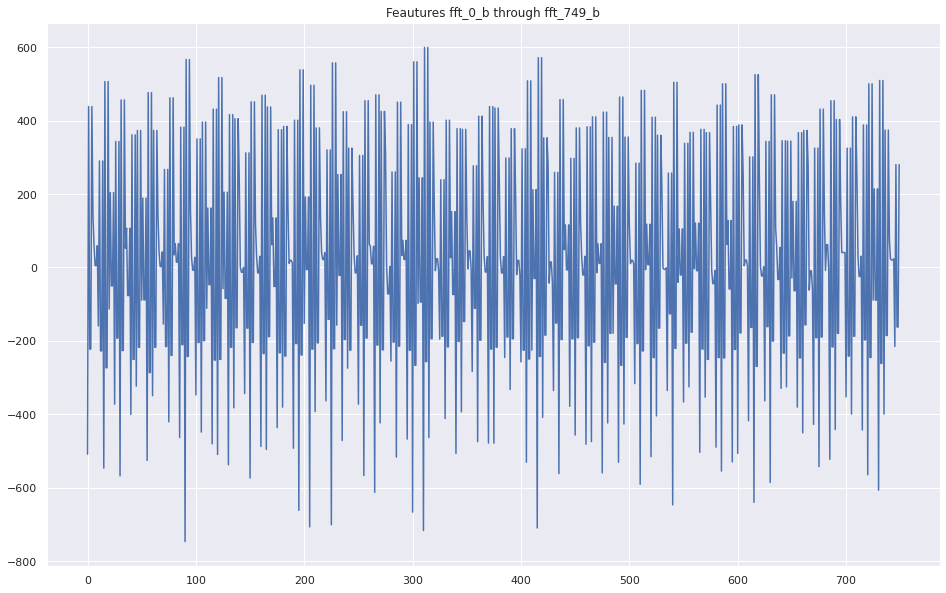

In [59]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title('Feautures fft_0_b through fft_749_b')
plt.show()

In [60]:
data['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [61]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [62]:
def preprocess_inputs(df):
  df = df.copy()
    
  df['label'] = df['label'].replace(label_mapping)
    
  y = df['label'].copy()
  X = df.drop('label', axis=1).copy()
    
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
  return X_train, X_test, y_train, y_test

In [63]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [64]:
X_train

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
993       14.400      29.7    -112.0     18.50      22.9    -3.63000   
1851      13.700      22.8      21.5      8.40      27.1     3.27000   
1253      -0.765      24.7    -578.0     11.90      27.9    -1.44000   
1228      28.200      32.6      32.1     30.30      24.6    -0.00524   
1461      31.900      31.0      34.4     30.80      24.0    -4.74000   
...          ...       ...       ...       ...       ...         ...   
1593       6.820      32.9    -741.0     32.60      27.0    -0.41300   
1147      31.500      32.1      31.3     28.80      25.0     5.32000   
1766     -11.800      26.3    -828.0      7.68      23.3    13.10000   
1122      27.600      32.2      28.8     25.60      24.1    -6.94000   
1346      13.700      29.6    -204.0     11.40      29.9     4.50000   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  \
993      -2.2200      -2.180      -3.240      -4.040       17.700   
1851      1.1200       6.480       2.300       5.660       13.300   
1253     -4.2000      -8.310      -4.340       4.040       -0.199   
1228     -0.0699       1.680       0.266      -4.470       25.700   
1461     -1.4000      -0.351      -1.830      -5.390       32.700   
...          ...         ...         ...         ...          ...   
1593     -2.6300     -87.300     -26.200      -3.350        8.190   
1147     -0.1400       1.370       5.610       8.300       27.400   
1766     -2.0100      21.900       2.890      -3.160      -29.300   
1122      1.0300       0.355      -8.380      -6.960       34.300   
1346     -0.5410       4.880       3.450       0.363        9.690   

      mean_d_1_a2  mean_d_2_a2  mean_d_3_a2  mean_d_4_a2  mean_d_5_a  \
993          31.1       -101.0        20.40         27.7      14.700   
1851         22.2         16.0         7.73         25.8      10.800   
1253         29.3       -580.0        15.10         24.1       0.109   
1228         33.2         27.5        27.10         30.0      30.600   
1461         29.9         34.9        31.80         32.5      35.800   
...           ...          ...          ...          ...         ...   
1593         33.9       -662.0        59.30         34.3       5.890   
1147         31.1         28.6        25.80         16.1      30.300   
1766         25.9       -867.0        -1.31         24.1      -7.620   
1122         31.9         30.1        33.20         30.1      27.800   
1346         30.1       -199.0         8.90         35.5      13.200   

      mean_d_6_a  mean_d_7_a  mean_d_8_a  mean_d_9_a  mean_d_10_a  \
993         30.6      -120.0       20.00        22.3         5.45   
1851        22.3        20.4        6.78        22.8        15.20   
1253        24.5      -569.0       13.10        27.6         1.79   
1228        32.1        34.9       33.10        23.7        28.40   
1461        33.4        34.3       31.70        21.0        27.00   
...          ...         ...         ...         ...          ...   
1593        34.5      -732.0       32.50        23.2         5.86   
1147        33.2        32.5       26.20        25.5        31.80   
1766        28.7      -813.0       13.60        25.6        -9.88   
1122        31.6        27.1       26.40        25.2        17.70   
1346        29.7      -214.0       10.40        24.1        14.60   

      mean_d_11_a  mean_d_12_a  mean_d_13_a  mean_d_14_a  mean_d_15_a  \
993          27.1       -120.0        13.70         19.8       19.500   
1851         26.0         20.4         9.75         28.9       15.500   
1253         22.6       -559.0        11.10         38.0       -4.680   
1228         33.8         32.9        30.30         21.1       28.000   
1461         32.0         32.3        27.50         23.8       31.900   
...           ...          ...          ...          ...          ...   
1593         31.5       -766.0        19.00         23.5        7.350   
1147         31.4         25.8    

In [65]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 2548)]            0         
_________________________________________________________________
tf.expand_dims_1 (TFOpLambda (None, 2548, 1)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 2548, 256)         198912    
_________________________________________________________________
flatten_1 (Flatten)          (None, 652288)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 1956867   
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 [==============================] - 224s 6s/step - loss: 41.7663 - accuracy: 0.6624 - val_loss: 11.2878 - val_accuracy: 0.8796
Epoch 2/50
38/38 [==============================] - 230s 6s/step - loss: 11.3312 - accuracy: 0.8747 - val_loss: 5.5631 - val_accuracy: 0.9130
Epoch 3/50
38/38 [==============================] - 232s 6s/step - loss: 3.0262 - accuracy: 0.9433 - val_loss: 5.8464 - val_accuracy: 0.9197
Epoch 4/50
38/38 [==============================] - 230s 6s/step - loss: 1.1023 - accuracy: 0.9737 - val_loss: 2.0631 - val_accuracy: 0.9565
Epoch 5/50
38/38 [==============================] - 230s 6s/step - loss: 0.2015 - accuracy: 0.9945 - val_loss: 2.8654 - val_accuracy: 0.9398
Epoch 6/50
38/38 [==============================] - 228s 6s/step - loss: 0.0773 - accuracy: 0.9936 - val_loss: 1.9252 - val_accuracy: 0.9599
Epoch 7/50
38/38 [==============================] - 229s 6s/step - loss: 1.8816 - accuracy: 0.9636 - val_loss: 4.0405 - val_accuracy: 0.9431
Epoch 8/50

In [69]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 93.281%


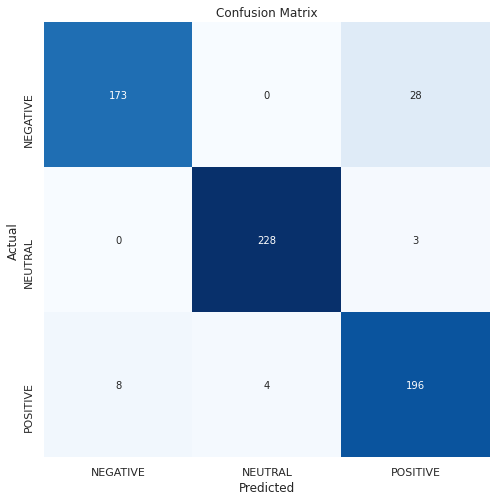

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.96      0.86      0.91       201
     NEUTRAL       0.98      0.99      0.98       231
    POSITIVE       0.86      0.94      0.90       208

    accuracy                           0.93       640
   macro avg       0.93      0.93      0.93       640
weighted avg       0.94      0.93      0.93       640



In [70]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)